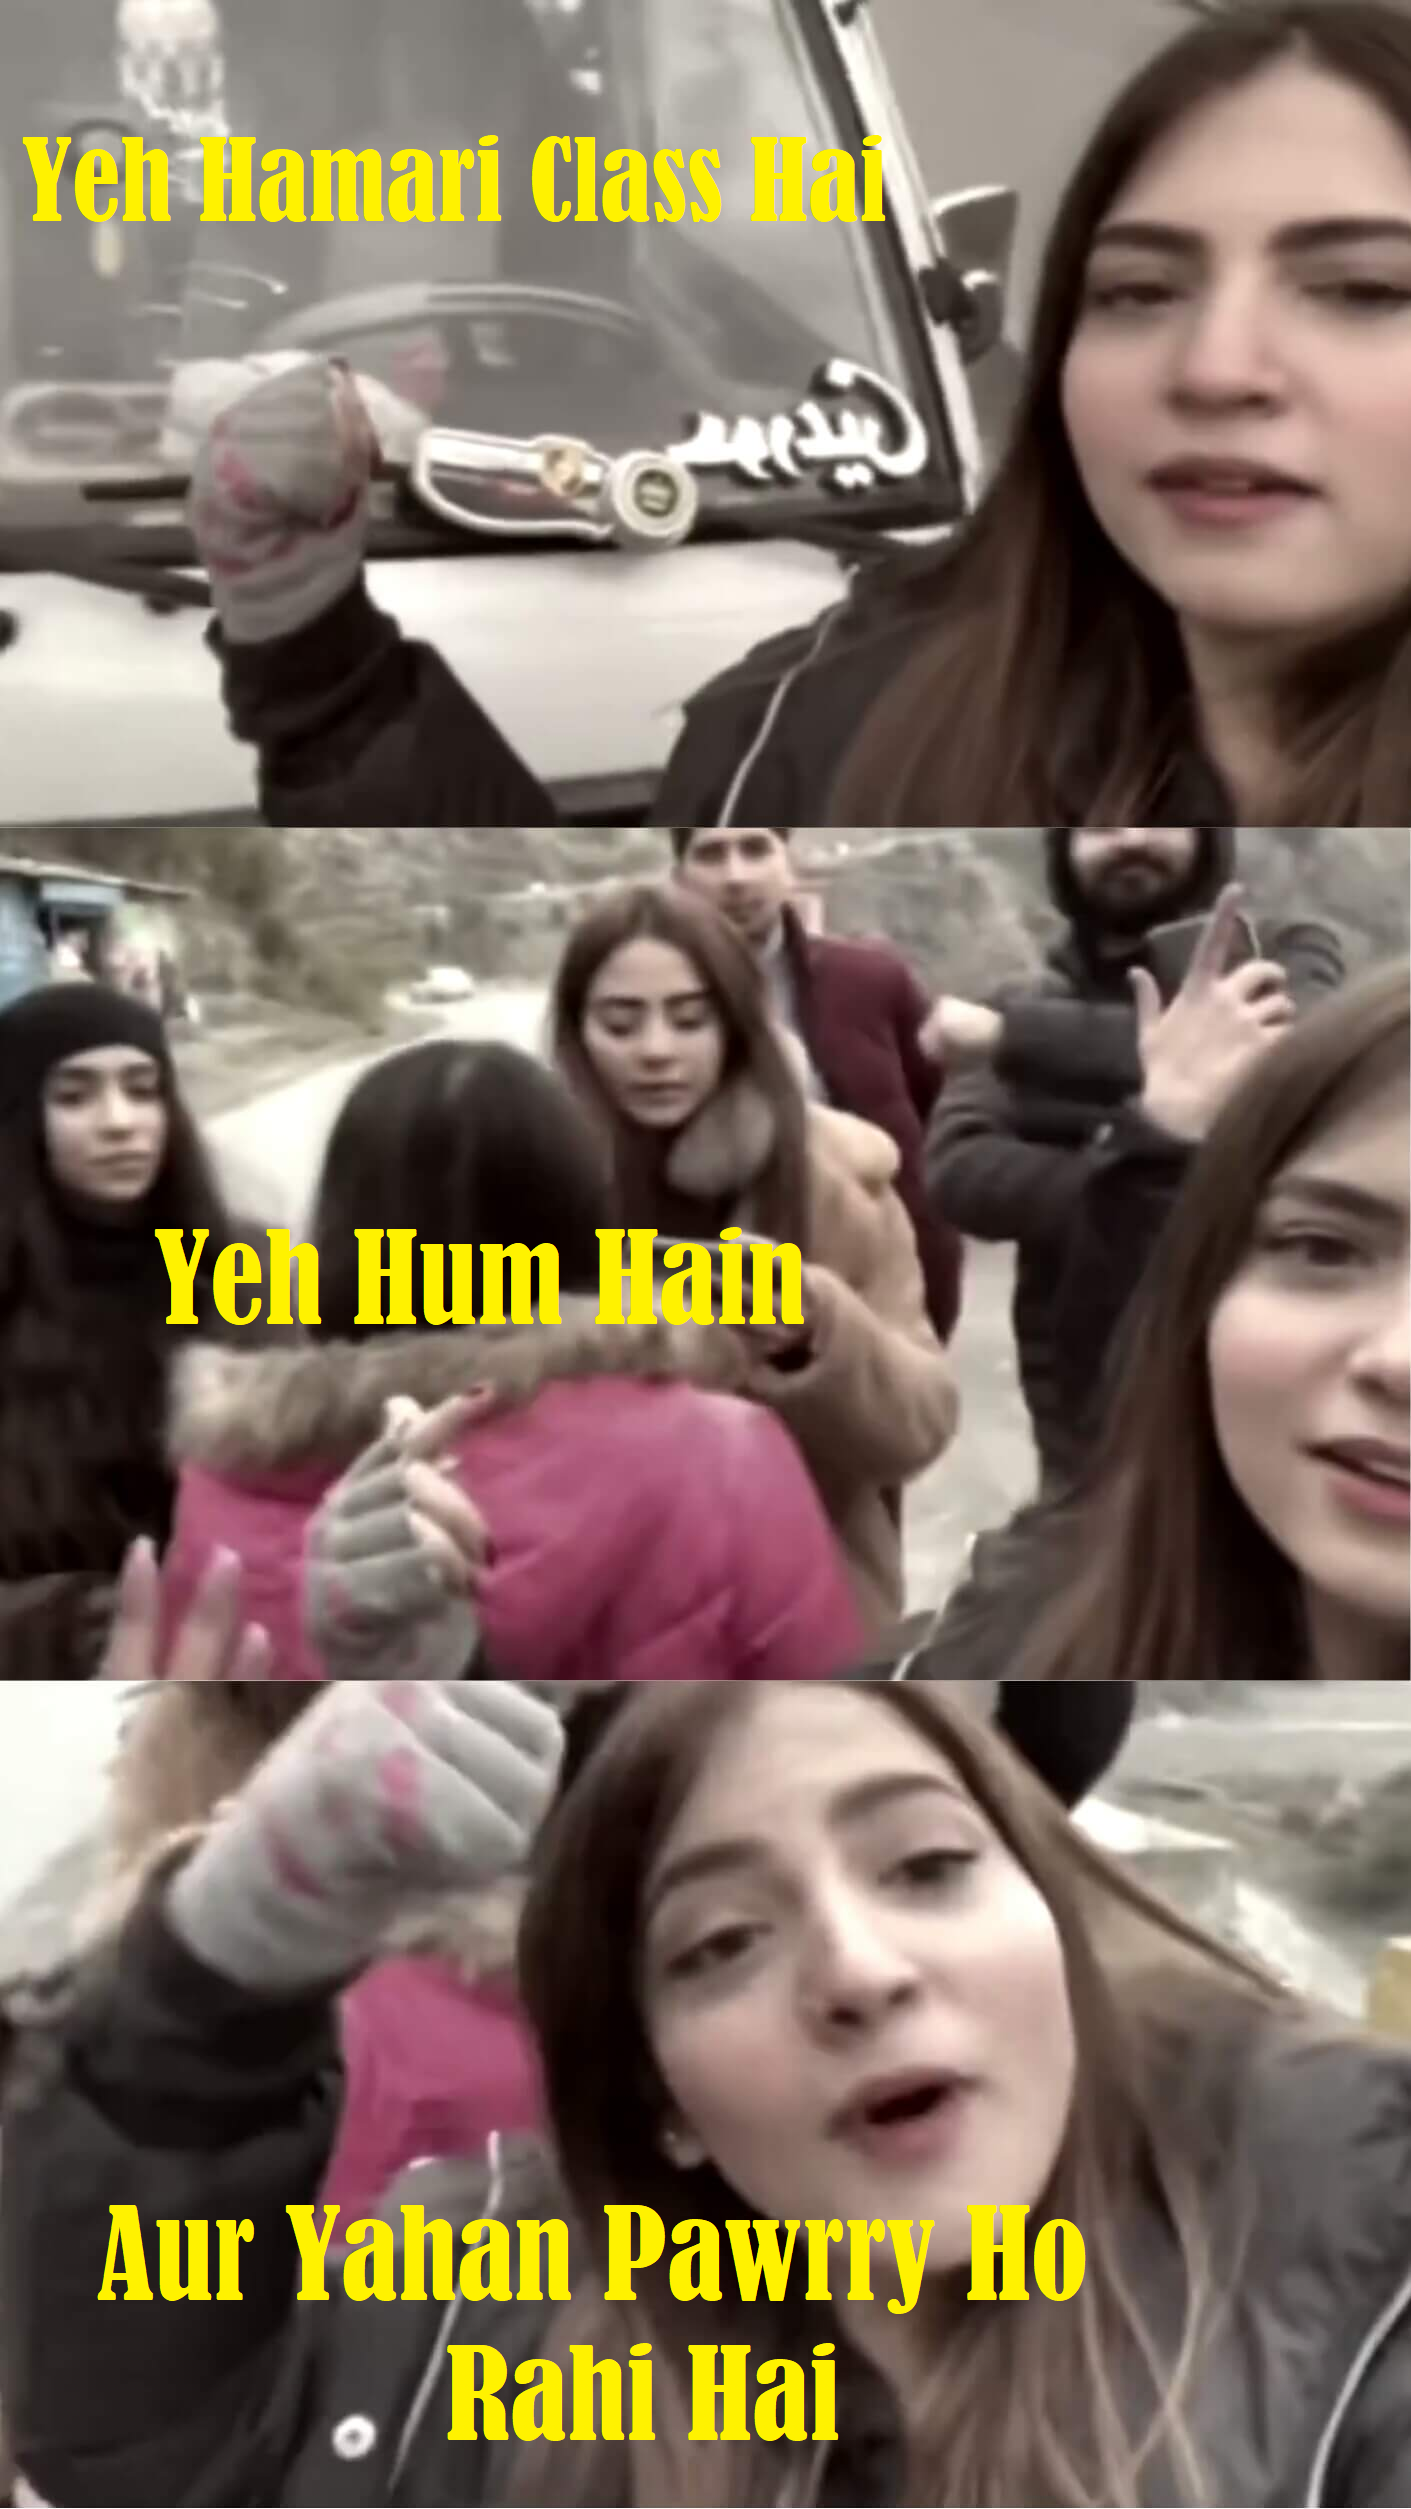

# Logistic Regression

#### Logistic Regression is a type of supervised machine learning algorithm used for classification Problem

#### Logistic Regression is a special case of linear regression used to predict the probability of occurence of a binary classes

#### YES! Logisitic regression is a REGRESSION MODEL

#### The model builds a regression model to predict the probability that a given feature that belongs to the one of the two categories

#### Just as linear regression follows a linear function to map a relationship between inputs and output, Logistic regression maps this relationship using Sigmoid or Logit function

### Classification

#### Classification is a type of supervised machine learning in which the target variables (output) are discrete

#### Examples Include;

* ****Heartbeat classification****

* ****Cancer patient vs Non Cancer patient****

* ****Spam Email vs Non Spam Email****

* ****Pass Vs Fail****

* ****Survived vs Died****

* ****heart disease vs Normal****

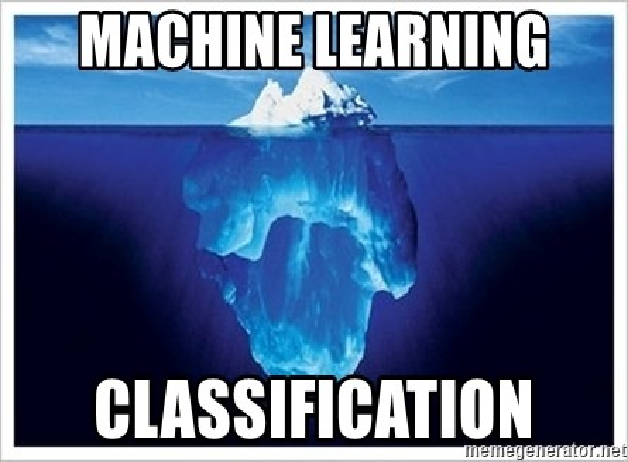

### Sigmoid Function

### The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1

### If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0

### If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO

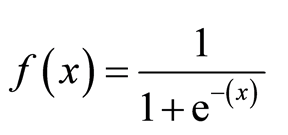

### This function basically transforms any given input to a range between 0 to 1

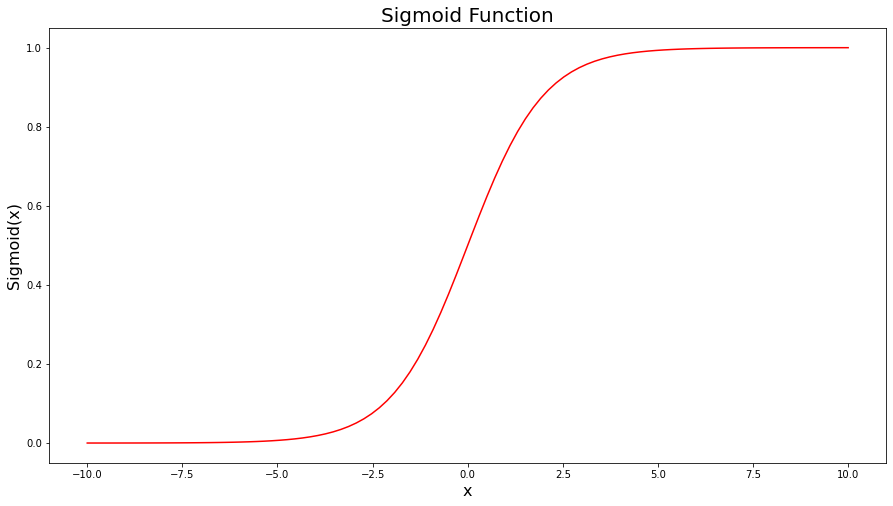

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
  
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(x, y, color = 'red')
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("Sigmoid(x)", fontsize = 16)
ax.set_title('Sigmoid Function', fontsize = 20)
  
plt.show()

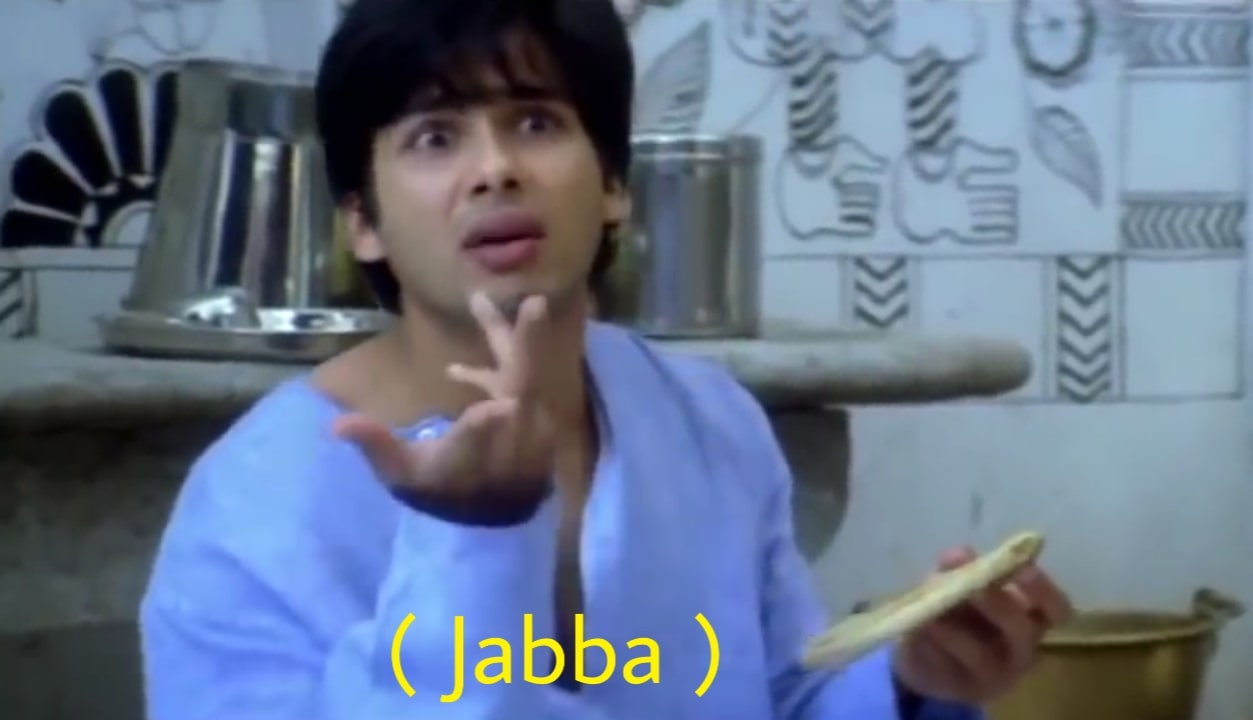

#### Logistic Regression estimates the probability of an event occuring

#### Example

#####  1) Whether a Subject has Cancer or Not

#####  2) Whether an email is spam or Not

#####  3) Whether a person buys insuranc or Not

### Now since the outcome is the probability of the class, so output is bound between 0 and 1

### Let me Explain it with an example

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('insurance_data.csv')
data.head(5)

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

#### This is a dataset containing age of the persons and whether they bought the insurance or not

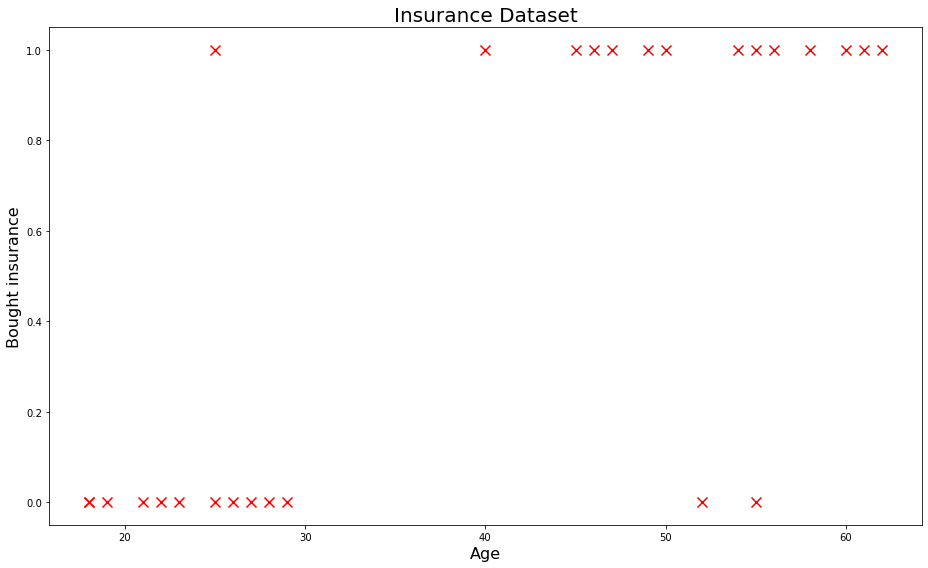

In [4]:
fig, axs = plt.subplots(figsize = (13,8))
axs.scatter(data['age'], data['bought_insurance'], marker = 'x', color = 'red' ,s = 100)
axs.set_xlabel('Age', fontsize = 16)
axs.set_ylabel('Bought insurance', fontsize = 16)
axs.set_title('Insurance Dataset', fontsize = 20)
plt.tight_layout()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [6]:
data.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

### Now what happens if we try draw a best fit line using linear regression?

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X = np.array(data['age'])
y = np.array(data['bought_insurance'])

X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.35, shuffle = True)

In [10]:
linear = LinearRegression()
linear.fit(xtrain,ytrain)

LinearRegression()

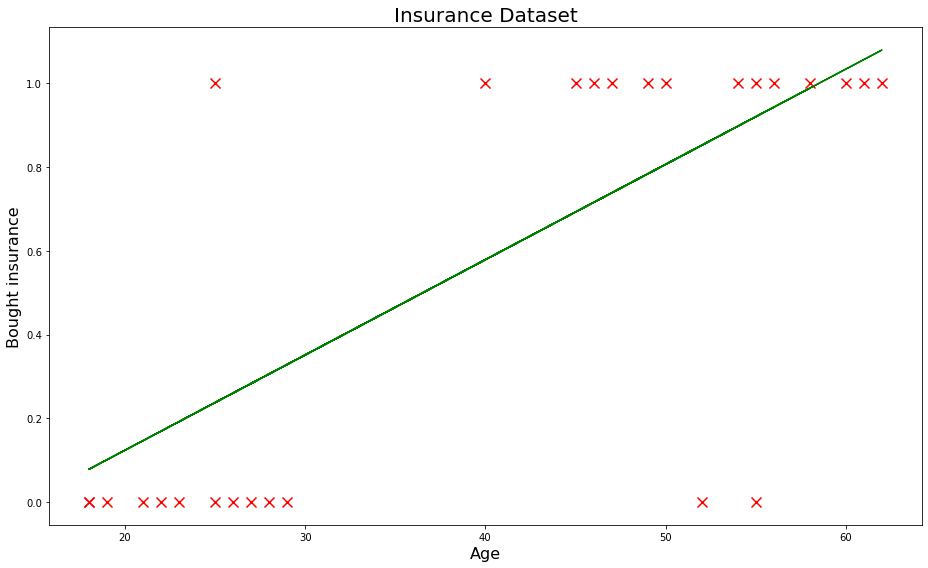

In [11]:
fig, axs = plt.subplots(figsize = (13,8))
axs.scatter(data['age'], data['bought_insurance'], marker = 'x', color = 'red' ,s = 100)
axs.plot(X, linear.predict(X), c = 'g')
axs.set_xlabel('Age', fontsize = 16)
axs.set_ylabel('Bought insurance', fontsize = 16)
axs.set_title('Insurance Dataset', fontsize = 20)
plt.tight_layout()

In [12]:
score = linear.score(xtest, ytest)
score

0.5511251262514494

#### Notice Our linear regression line cannot find a best fit line for such a problem where we want to categorize a output into one of the two classes

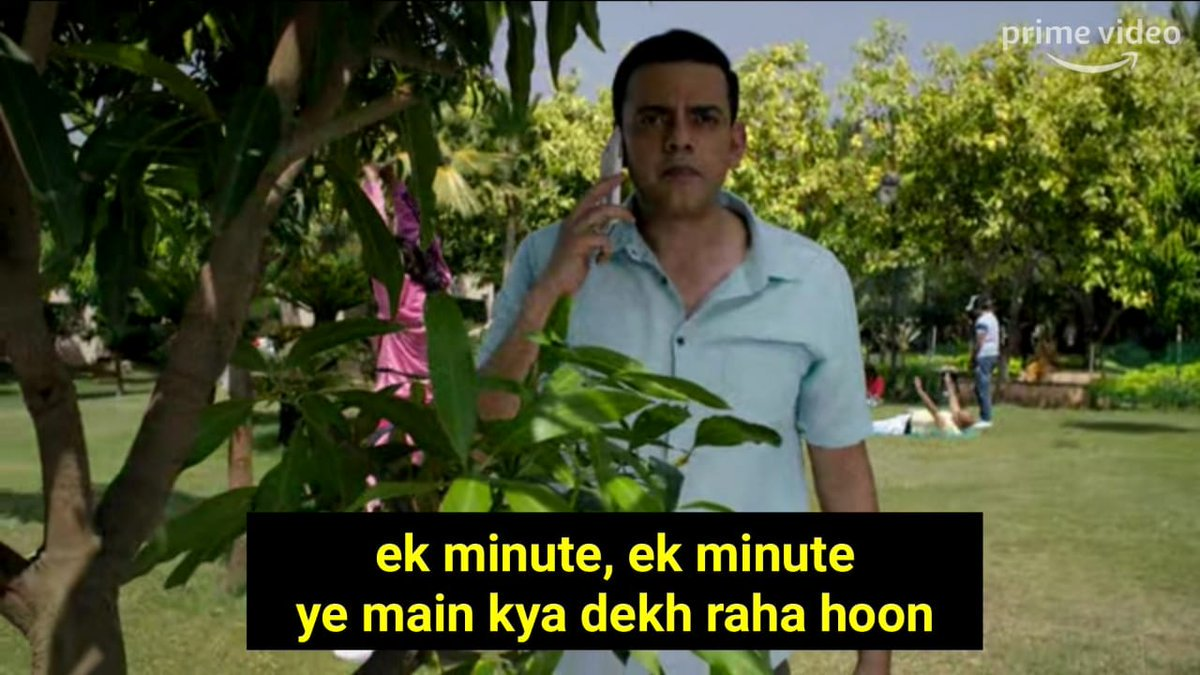

In [13]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [14]:
logistic = LogisticRegression()
logistic.fit(xtrain,ytrain)

C:\Users\Demuth\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
logistic.coef_

array([[0.12806523]])

In [16]:
logistic.intercept_

array([-4.57636154])

In [17]:
pred = logistic.predict(xtest)
pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score

print("Logistic Regression model accuracy(in %):", accuracy_score(ytest, pred)*100)

Logistic Regression model accuracy(in %): 90.0


In [19]:
score_logic = logistic.score(xtest, ytest)
score_logic

0.9

#### predict_proba() function returns the probability of each class predicted by the model

In [20]:
logistic.predict_proba(xtest)

array([[0.0427968 , 0.9572032 ],
       [0.7981434 , 0.2018566 ],
       [0.11075714, 0.88924286],
       [0.85307515, 0.14692485],
       [0.1546175 , 0.8453825 ],
       [0.03784715, 0.96215285],
       [0.75372899, 0.24627101],
       [0.06944207, 0.93055793],
       [0.19112691, 0.80887309],
       [0.70317641, 0.29682359]])

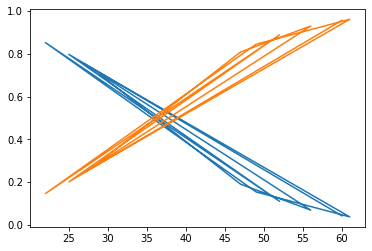

In [21]:
plt.plot(xtest, logistic.predict_proba(xtest))

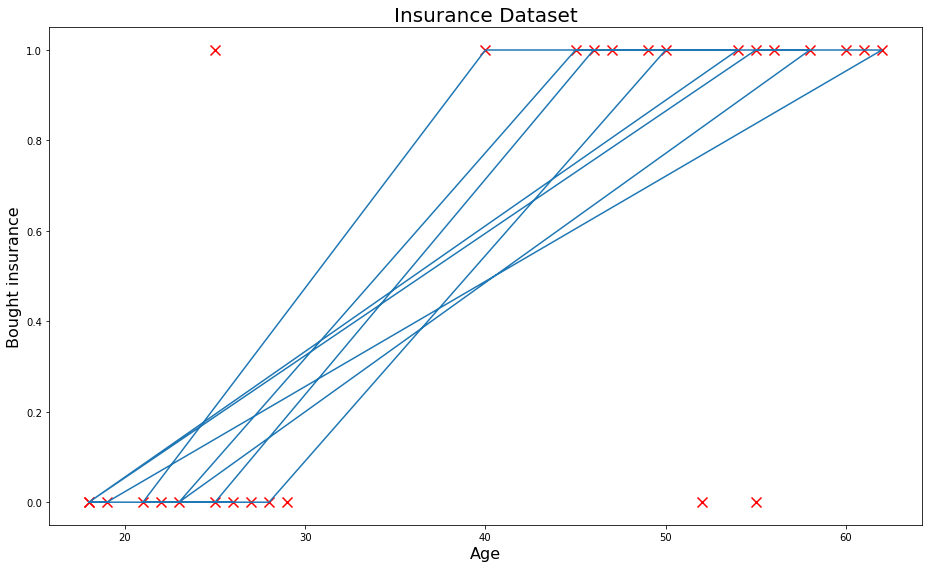

In [22]:
fig, axs = plt.subplots(figsize = (13,8))
axs.scatter(data['age'], data['bought_insurance'], marker = 'x', color = 'red' ,s = 100)
axs.plot(xtrain, (logistic.predict(xtrain)))
axs.set_xlabel('Age', fontsize = 16)
axs.set_ylabel('Bought insurance', fontsize = 16)
axs.set_title('Insurance Dataset', fontsize = 20)
plt.tight_layout()

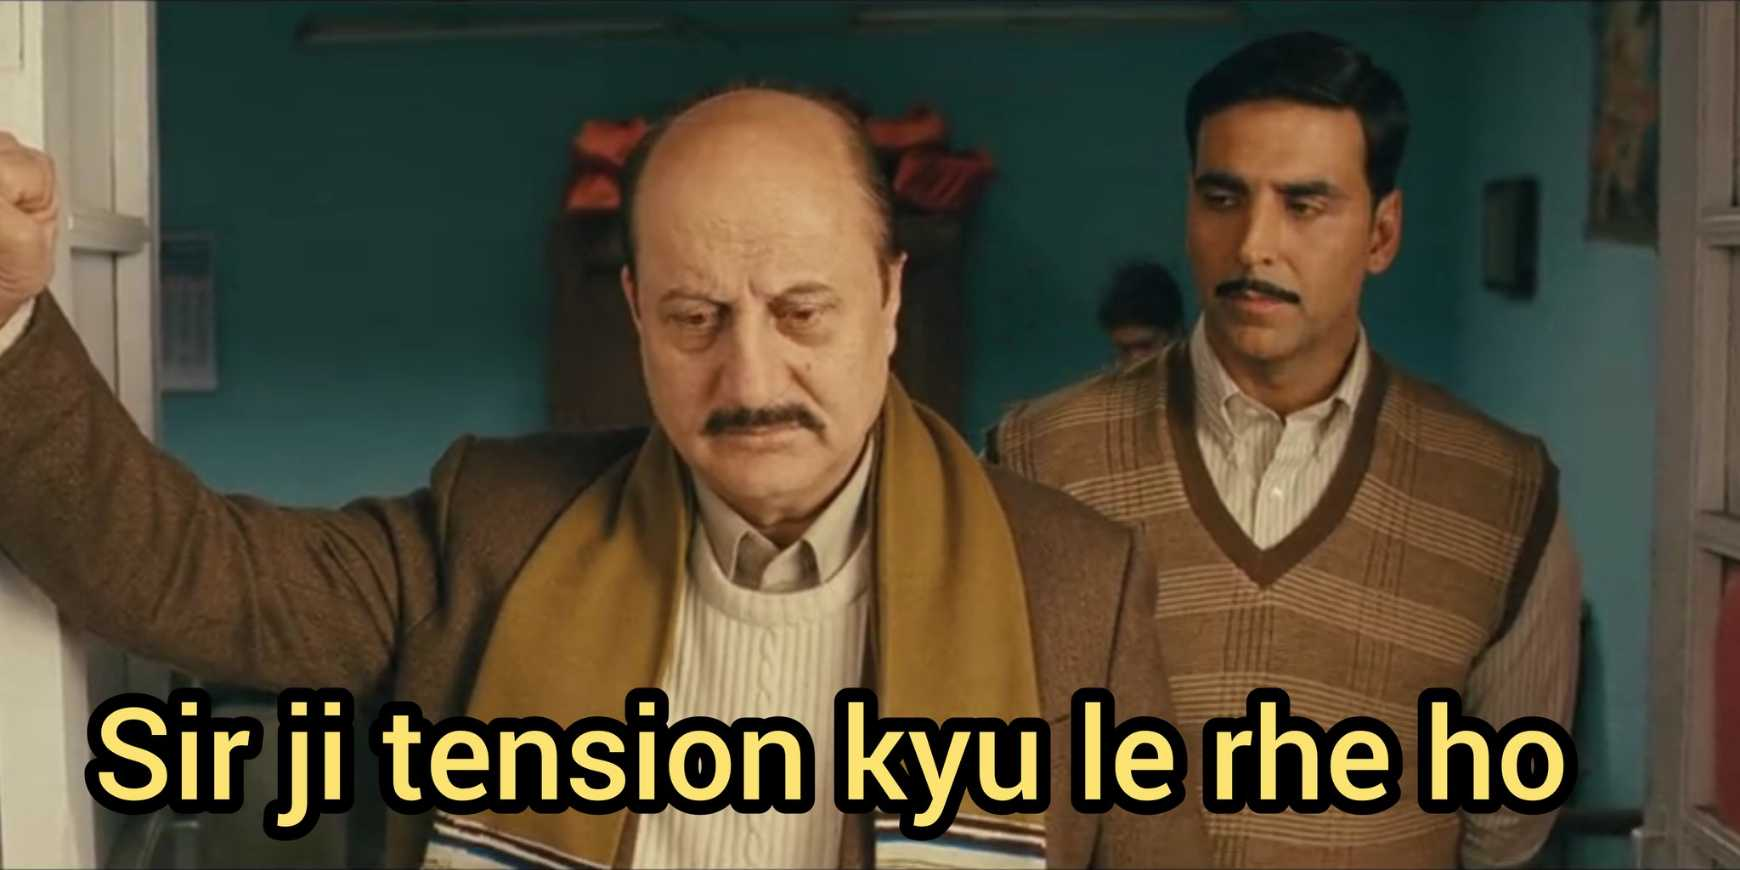

## Model Evaluation

### Confusion Matrix

****Confusion matrix is used to evaluate the performance of the classification models****

****Confusion matrix basically gives the number of correct and incorrect predictions****

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(ytest, pred)
print(cm)

[[4 1]
 [0 5]]


****Since it's a binary classification problem, therefore we have 2x2 matrix as output****

****The diagnoal values represent the correct predctions whereas non-diagnoal values are the incorrect predictions****

### Beutifying the Confusion Matrix

In [25]:
import seaborn as sns

#### heatmap() function from the seaborn is used to beautify the confusion matrix

<AxesSubplot:>

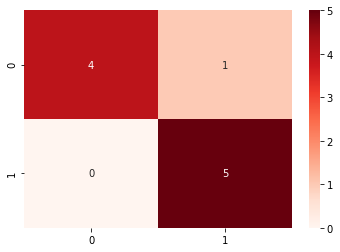

In [26]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Reds" ,fmt='g')

#### Let's do some denting painting 

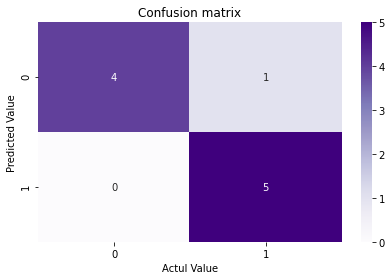

In [27]:
class_names=[0,1] # 0 for didn't bought insurance, and 1 for Bought insurance

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')

ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Predicted Value')
plt.xlabel('Actul Value')
plt.tight_layout()


### Understanding Confusion Matrix

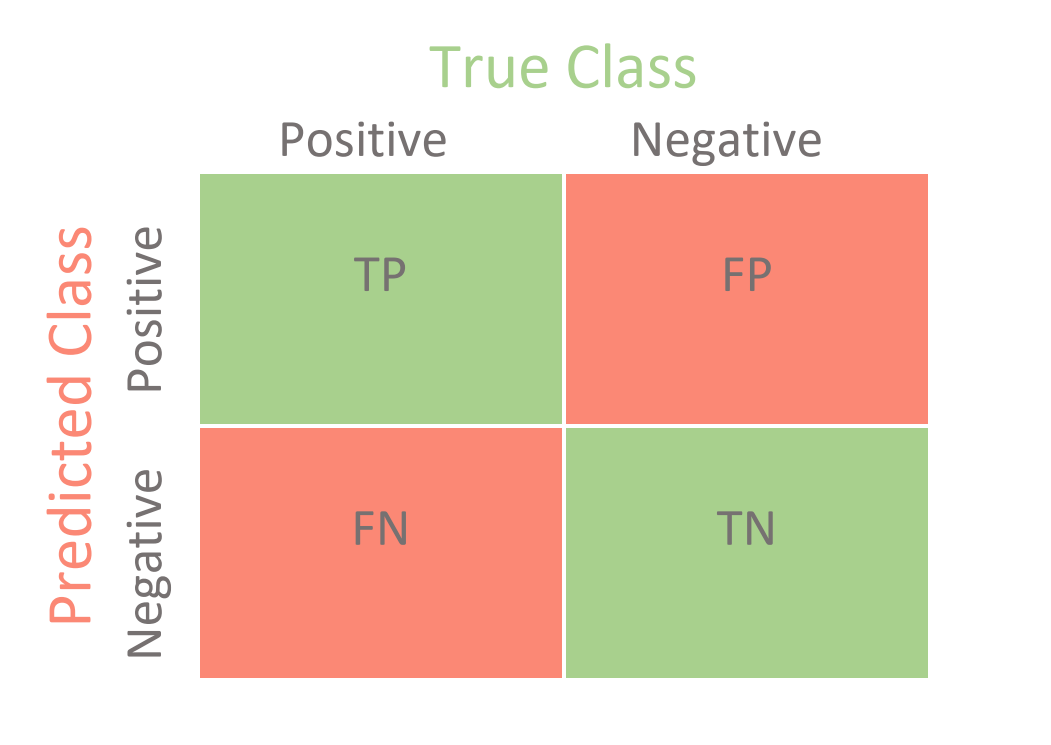

#### Confusion matrix tells us how much our model is confused while making predictions ;p

#### It is a Performance Matrix used to evaluate machine learning classification problems

#### Row indicate the Actual values, whereas the columns indicate the predicted values

#### It has 4 different combinations of predicted and actual values

### Components of Confusion Matrix

#### There are 4 components of confusion matrix

* ****TP ==> True Positive****

* ****TN ==> True Negative****

* ****FP ==> False Positive****

* ****FN ==> False Negative****

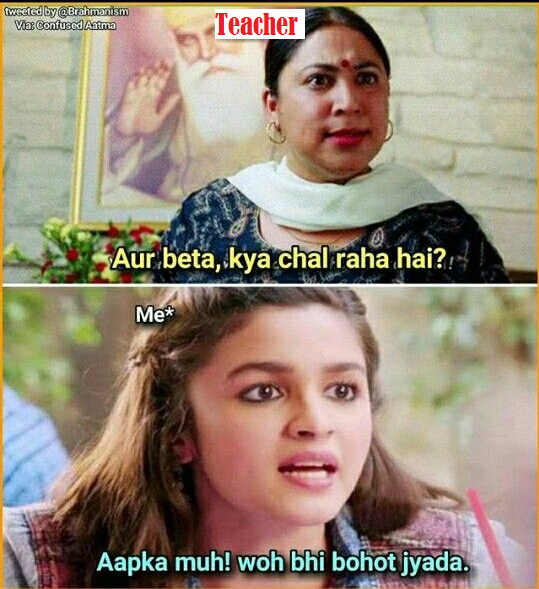

### 1) True Positive

#### Model Predicted True and it's actual value is also True

****Example****

* ****Model predicted that the person bought insurance, and the person actually bought insurance****

### 2) True Negative

#### Model Predicted Negative, and it's actual value is also Negative (True)

****Example****

* ****Model predicted that the person did not bought insurance, and in reality, the person did bought insurance****

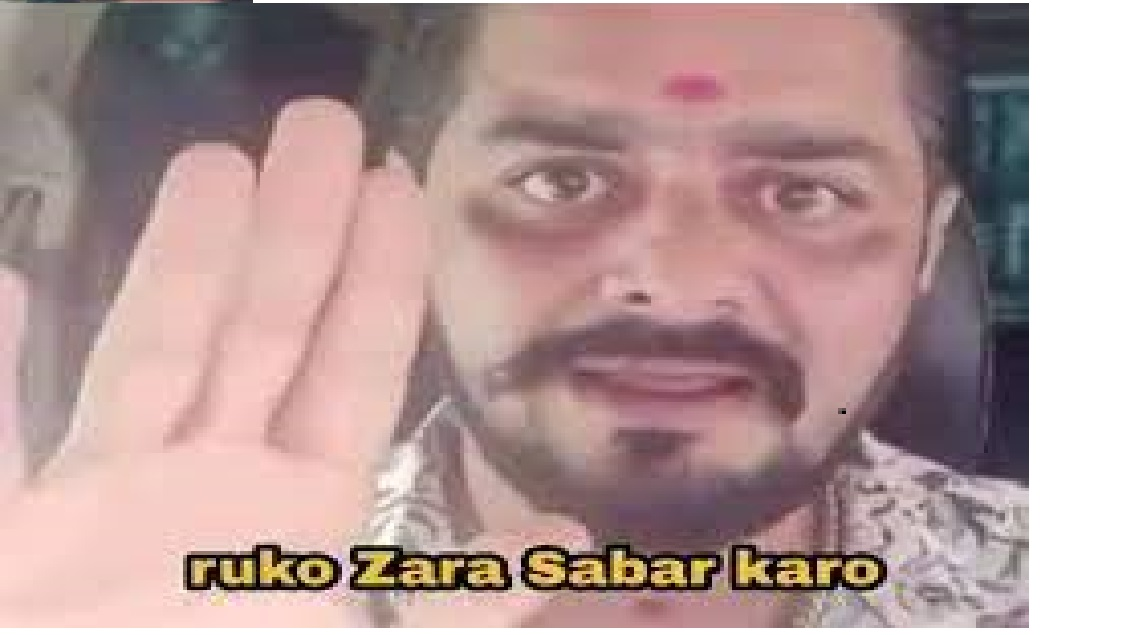

### 3) False Positive (Type 1 Error)

#### Model Predicted Positive, but actually it is False

****Example****

* ****Model Predicted that the person bought insurance, but in reality the person DID NOT****

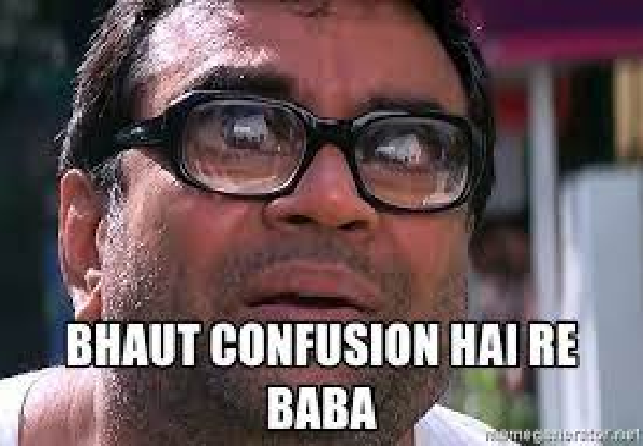

### 4) False Negative (Type 2 Error)

#### Model Predicted Negative, and actually it's False

****Examples****

* ****Model predicted that the person did not bought insurance, but in reality the person did bought insurance****

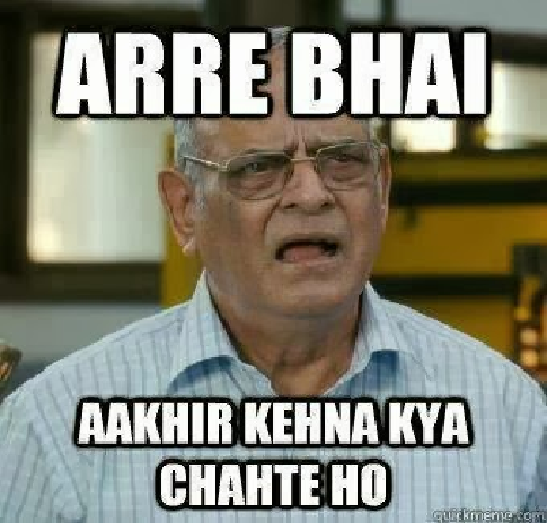

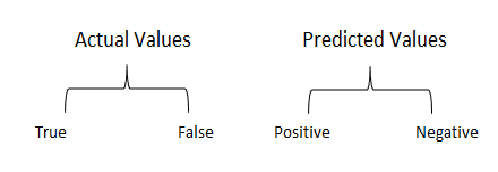

This is our confusion matrix


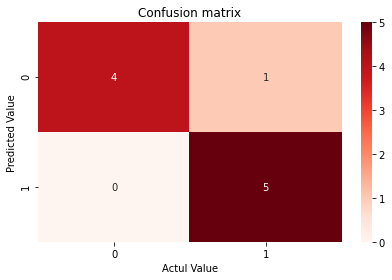

In [28]:
print('This is our confusion matrix')

class_names=[0,1] # 0 for didn't bought insurance, and 1 for Bought insurance

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Reds" ,fmt='g')

ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Predicted Value')
plt.xlabel('Actul Value')
plt.tight_layout()


****Each Row Represents Actual values****

****Each Column Represents Predicted Values****

****First row shows the values of class 0 (Did not Bought Insurance)****

****Second row shows the values for class 1 (Bought Insurance)****

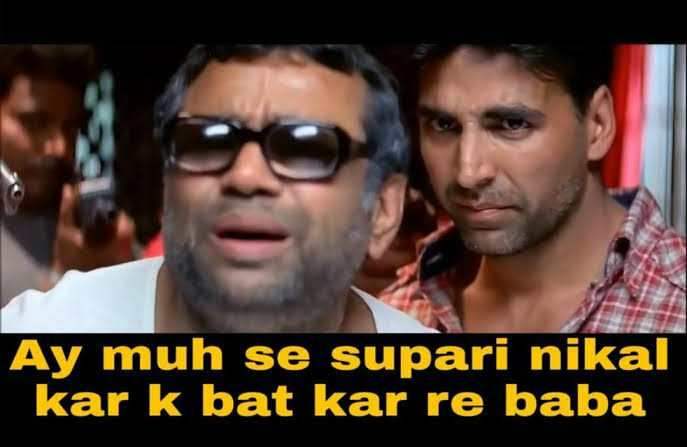

### Classification Report

#### Classification Report is also a performance evaluation metric in supervised machine learning

****Classification Report holds the values for Precision, Recall, F1-score, and support of the trained model****

In [75]:
from sklearn.metrics import classification_report

In [76]:
cr = classification_report(ytest, pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



### Precision

$$Precision = TP \displaystyle \Bigg / TP + FP$$

#### Precision is a measure of how close the predicted values values are to eachother

#### In machine learning precision means, of all the positive values predicted by the model, how many are actually positive

#### Higher the precision, the better and vice versa

#### We can also use precision_score() function from sklearn.metrics

In [78]:
from sklearn.metrics import precision_score

precision_score(ytest, pred)

0.8333333333333334

### Accuracy

$$Accuracy = TP + TN \displaystyle \Bigg / TP + TN + FP + FN$$

#### Accuracy is a measure of how close the predicted values are to the actual value

#### The above equation implies, of all the values in the data how many are predicted correctly.

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, pred)

0.9

### Recall

$$Recall = TP \displaystyle \Bigg / TP + FN$$

#### Recall is a measure of how accurately our model is able to identify the true positives

#### Higher the value of recall the better

In [33]:
from sklearn.metrics import recall_score

recall_score(ytest, pred)

1.0

### F1 Score

$$F1-score = 2*Precision*Recall \displaystyle \Bigg /Precision + Recall$$

#### F1 Score gives a balance of both precision and recall

#### It is the Harmonic mean between precision and recall

In [34]:
from sklearn.metrics import f1_score
f1_score(ytest,pred)

0.9090909090909091

### Support  

#### Support shows the number of actual instances of the class in the specified dataset

In [35]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(ytest, pred)

(array([1.        , 0.83333333]),
 array([0.8, 1. ]),
 array([0.88888889, 0.90909091]),
 array([5, 5], dtype=int64))

## One Hot Encoding

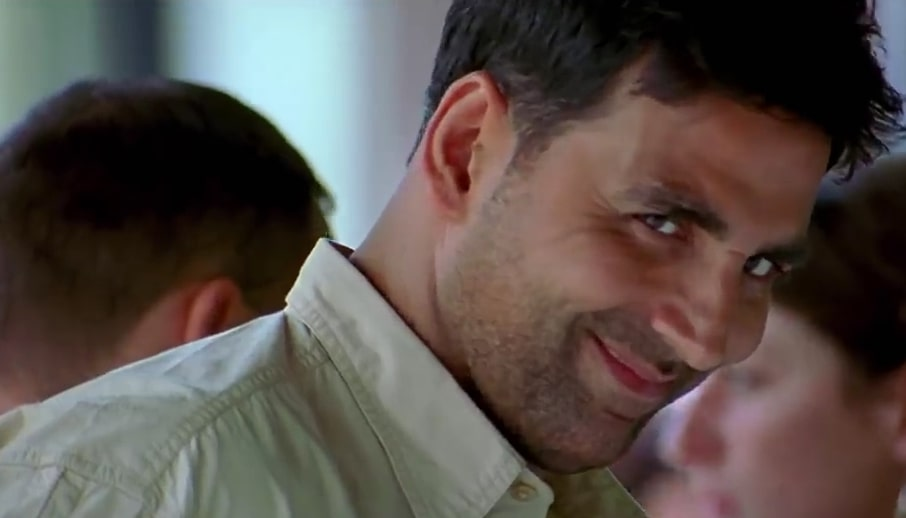

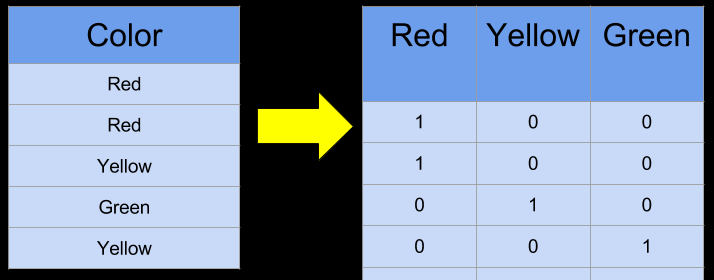

#### One Hot Encoding is preprocessing technique used to transform categorical data into numeric form

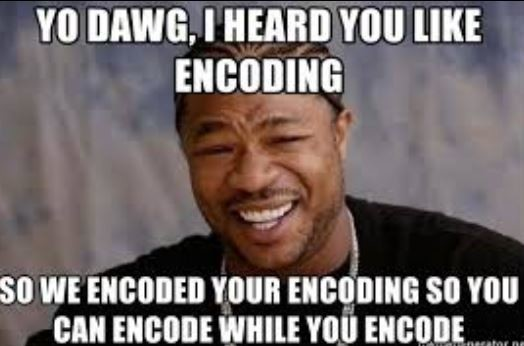

In [115]:
titanic = pd.read_csv('titanic.csv')
titanic.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [116]:
categorical = titanic[['Sex','Embarked']]
categorical

Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]

In [117]:
categorical.Sex.replace(['male', 'female'], [0, 1], inplace = True)

C:\Users\Demuth\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [119]:
categorical.head(8)

Sex Embarked
0    0        S
1    1        C
2    1        S
3    1        S
4    0        S
5    0        Q
6    0        S
7    0        S

In [120]:
categorical.isnull().sum()

Sex         0
Embarked    2
dtype: int64

In [121]:
categorical.Embarked.mode()

0    S
dtype: object

In [122]:
categorical.Embarked.fillna('S', inplace = True)

C:\Users\Demuth\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [123]:
categorical.isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [124]:
categorical.Embarked.replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)

C:\Users\Demuth\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [125]:
categorical.Embarked.unique()

array([0, 1, 2], dtype=int64)

In [126]:
categorical.head(10)

Sex  Embarked
0    0         0
1    1         1
2    1         0
3    1         0
4    0         0
5    0         2
6    0         0
7    0         0
8    1         0
9    1         1

In [178]:
from sklearn.preprocessing import OneHotEncoder

In [179]:
embarked = categorical.copy()

In [180]:
embark = embarked.Embarked.values.reshape(-1,1)

In [181]:
encoder = OneHotEncoder(sparse = False)
converted = encoder.fit_transform(embark)

In [182]:
converted

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [183]:
embarked["EmbarkedS"] = converted[:,0]
embarked["EmbarkedC"] = converted[:,1]
embarked["EmbarkedQ"] = converted[:,2]

In [138]:
embarked.head(5)

Sex  Embarked  EmbarkedS  EmbarkedC  EmbarkedQ
0    0         0        1.0        0.0        0.0
1    1         1        0.0        1.0        0.0
2    1         0        1.0        0.0        0.0
3    1         0        1.0        0.0        0.0
4    0         0        1.0        0.0        0.0

In [139]:
embarked.drop('Embarked', inplace = True, axis = 1)

In [141]:
embarked.head(5)

Sex  EmbarkedS  EmbarkedC  EmbarkedQ
0    0        1.0        0.0        0.0
1    1        0.0        1.0        0.0
2    1        1.0        0.0        0.0
3    1        1.0        0.0        0.0
4    0        1.0        0.0        0.0

In [160]:
X = (embarked)

In [161]:
X.describe()

Sex   EmbarkedS   EmbarkedC   EmbarkedQ
count  891.000000  891.000000  891.000000  891.000000
mean     0.352413    0.725028    0.188552    0.086420
std      0.477990    0.446751    0.391372    0.281141
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000
50%      0.000000    1.000000    0.000000    0.000000
75%      1.000000    1.000000    0.000000    0.000000
max      1.000000    1.000000    1.000000    1.000000

In [164]:
y = np.array(titanic.Survived)

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True)

In [167]:
t_logistic = LogisticRegression()

In [168]:
t_logistic.fit(x_train, y_train)

LogisticRegression()

In [169]:
x_test.shape

(179, 4)

In [170]:
y_test.shape

(179,)

In [171]:
prob = t_logistic.predict_proba(x_test)
prob

array([[0.70073572, 0.29926428],
       [0.28911942, 0.71088058],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.28911942, 0.71088058],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.28911942, 0.71088058],
       [0.28911942, 0.71088058],
       [0.83108484, 0.16891516],
       [0.70073572, 0.29926428],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.28911942, 0.71088058],
       [0.28911942, 0.71088058],
       [0.83108484, 0.16891516],
       [0.28911942, 0.71088058],
       [0.70073572, 0.29926428],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.83108484, 0.16891516],
       [0.85578017, 0.14421983],
       [0.28911942, 0.71088058],
       [0.

In [172]:
predictions = t_logistic.predict(x_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [177]:
print(f'The accuracy of our model is: {accuracy_score(y_test, predictions)}')

The accuracy of our model is: 0.7653631284916201


### Model Evaluation

### 1) Confusion Matrix

In [173]:
cm1 = confusion_matrix(y_test, predictions)
cm1

array([[97, 16],
       [26, 40]], dtype=int64)

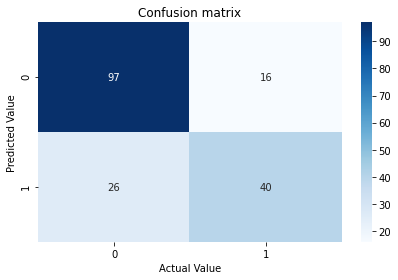

In [174]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="Blues" ,fmt='g')

ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')
plt.tight_layout()


### Classification Report

In [175]:
cf1 = classification_report(y_test, predictions)
print(cf1)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       113
           1       0.71      0.61      0.66        66

    accuracy                           0.77       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



In [176]:
y_test = y_test.reshape(len(y_test),1)

In [184]:
print(f'The accuracy of Our model is: {accuracy_score(y_test,predictions)}')

The accuracy of Our model is: 0.7653631284916201


In [185]:
print(f'The Precision of Our model is: {precision_score(y_test,predictions)}')

The Precision of Our model is: 0.7142857142857143


In [186]:
print(f'The Recall of Our model is: {recall_score(y_test,predictions)}')

The Recall of Our model is: 0.6060606060606061


In [187]:
print(f'The F1 score of Our model is: {f1_score(y_test,predictions)}')

The F1 score of Our model is: 0.6557377049180327


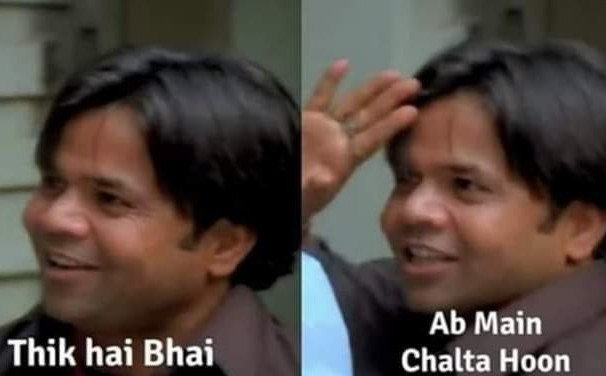